In [ ]:
import os
import cv2
import itertools as it
from tqdm import tqdm_notebook as tqdm
import numpy as np
from matplotlib import pyplot as plt


from impl import *

In [21]:
images_dir = "E:/Bobst/Images"
images_paths = ["{d}/{f}".format(d=images_dir, f=f) for f in os.listdir(images_dir)]

In [22]:
images = [cv2.imread(p) for p in tqdm(images_paths[320:340])]

In [23]:
cropped_images = [crop_contour(img) for img in tqdm(images)]

In [24]:
min_shape = get_min_width_height(cropped_images)

In [25]:
resized_images = [cv2.resize(img, min_shape) for img in tqdm(cropped_images)]

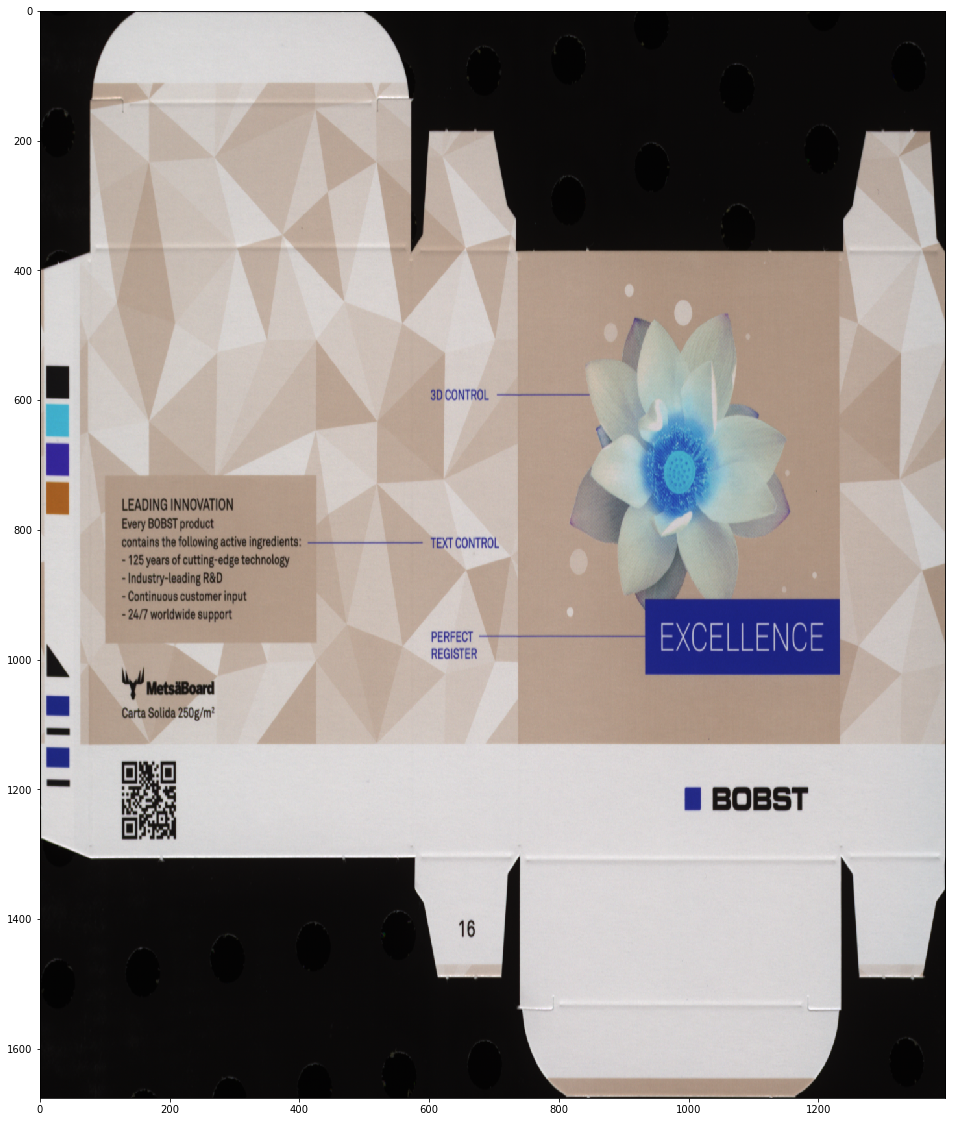

In [26]:
plt.figure(figsize=(20, 20))
plt.imshow(resized_images[-2])
plt.show()

In [27]:
std = np.std(resized_images, axis=0)

In [30]:
std.shape

(1676, 1396, 3)

In [33]:
cv2.imwrite("E:\dif.jpg", std)

True

In [ ]:
orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [ ]:
kp_des = [orb.detectAndCompute(img,None) for img in tqdm(images)]

In [ ]:
combinations = list(it.combinations(range(len(kp_des)), 2))

In [ ]:
all_matches = [bf.match(kp_des[i][1], kp_des[j][1]) for i,j in tqdm(combinations)]

In [ ]:
distances = [np.sum([m.distance for m in matches]) for matches in all_matches]

In [ ]:
np.argsort(distances)

In [ ]:
np.max(distances), np.min(distances)

In [ ]:
idx = np.argsort(distances)[-1]
distances[idx], combinations[idx]

In [ ]:
img_idx1 = combinations[idx][0]
img_idx2 = combinations[idx][1]

kp1 = kp_des[img_idx1][0]
kp2 = kp_des[img_idx2][0]

matches = all_matches[idx]

img1 = images[img_idx1]
img2 = images[img_idx2]

In [ ]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:100], None, flags=2)

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(img3)
plt.show()

In [ ]:
dif = cv2.subtract(img1, img2)

In [ ]:
dif2 = cv2.subtract(resized_img[0], resized_img[1])

In [ ]:
cv2.imwrite("E:\dif2.jpg", dif2)

In [ ]:
plt.figure(figsize=(20, 15))
plt.imshow(dif2)
plt.show()

In [ ]:
img = cv2.imread(pictures[0])
img_cropped = crop_contour(img)

cv2.imwrite("E:\diff.jpg", img_cropped)

In [ ]:
mask = np.zeros_like(im) + 255 # Create mask where white is what we want, black otherwise
cv2.drawContours(mask, cnt, idx, 255, -1) # Draw filled contour in mask
out = np.zeros_like(im) # Extract out the object and place into output image
out[mask == 255] = im[mask == 255]

cv2.imwrite("E:\diff.jpg", out)

In [35]:
def draw_contour(img):
    img = img.copy()
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    _, thresh = cv2.threshold(img_gray,127,255,0)
    
    _, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(contours, key = cv2.contourArea)
    
    cv2.drawContours(img, [cnt], 0, (0,255,0), 3)
    return img

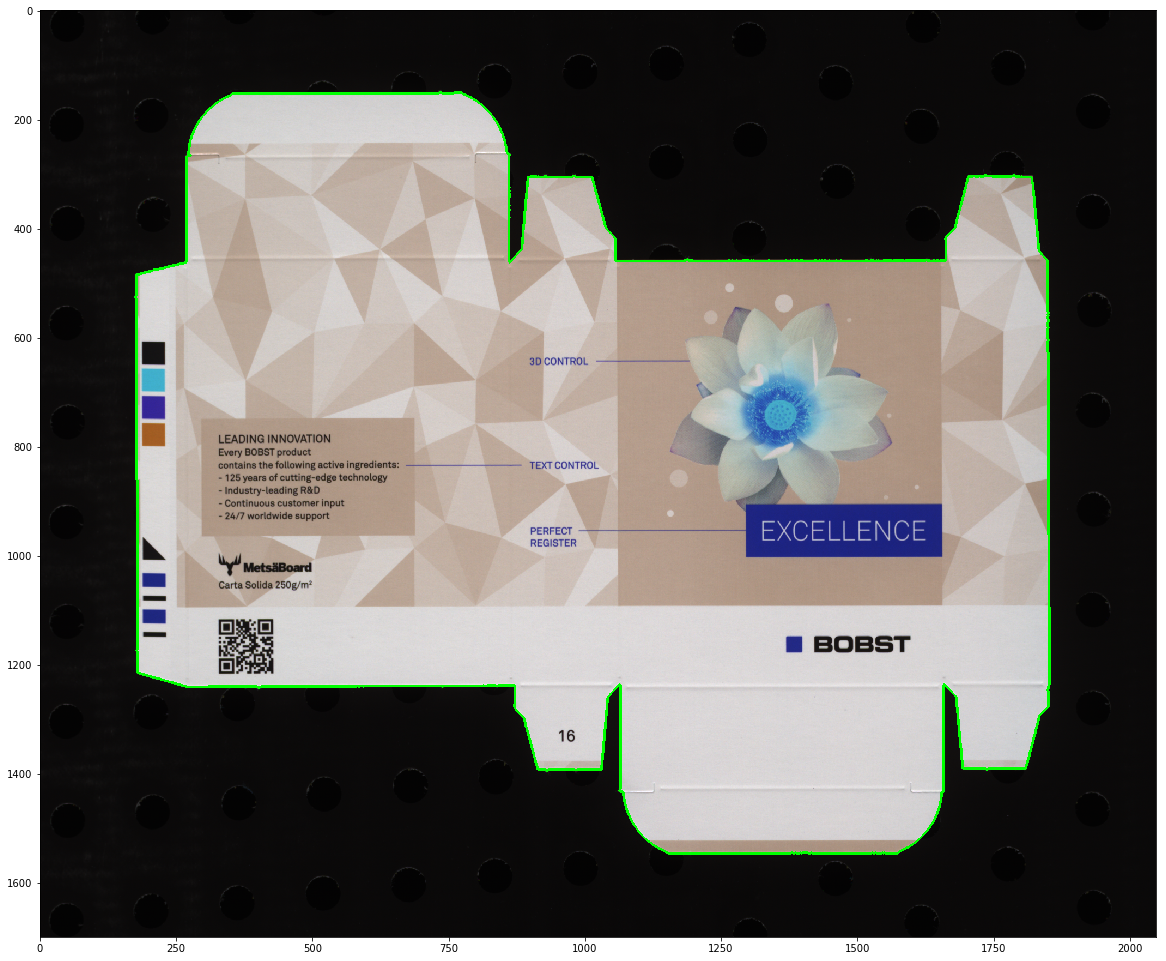

In [36]:
img = draw_contour(images[-4])

plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.show()